<a href="https://colab.research.google.com/github/keunsooyoon/python202206/blob/main/pythonbasic13_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. 문  제 파  악 - 배경 이해, 분석 목표 설정, 분석 일정, 데이터 확보

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(housing['DESCR'])

# 지역의 1인당 범죄 발생률 - CRIM     per capita crime rate by town
# 주택용 토지의 비율       - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# 상업용 토지의 비율       - INDUS    proportion of non-retail business acres per town
# 찰스강 인접 여부(인접 1) - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 일산화질소 농도          - NOX      nitric oxides concentration (parts per 10 million)
# 방의 개수                - RM       average number of rooms per dwelling
# 오래된 집의 비율         - AGE      proportion of owner-occupied units built prior to 1940
# 근무지까지의 거리        - DIS      weighted distances to five Boston employment centres
# 고속도로 접근성          - RAD      index of accessibility to radial highways
# 재산세                   - TAX      full-value property-tax rate per $10,000
# 교사 학생 비율           - PTRATIO  pupil-teacher ratio by town
# 흑인 거주 비율           - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
# 저소득층 비율            - LSTAT    % lower status of the population
# 소유주 거주 주택의 중간가격 - MEDV     Median value of owner-occupied homes in $1000's

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# 데이터 프레임으로 변환

data = pd.DataFrame(housing['data'], columns = housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [8]:
df = pd.concat([data,target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 , 그림

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# 결측치 확인

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [11]:
# 상관 관계

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


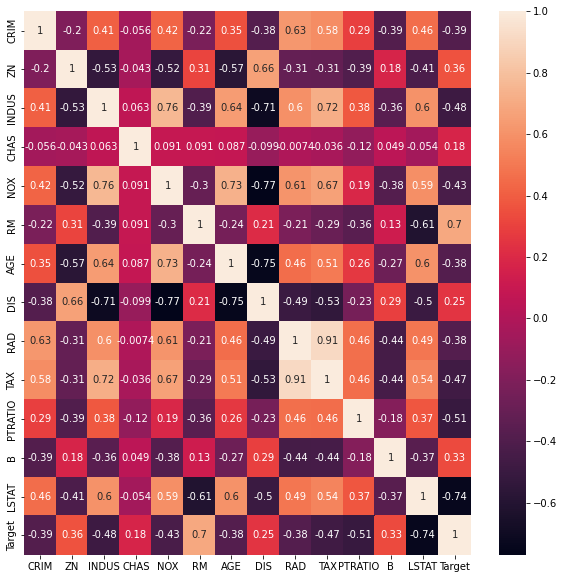

In [13]:
plt.figure(figsize=(10,10))  # 전체 크기 즉 배경 크기 확대
sns.heatmap(df.corr(), annot=True)

In [14]:
# 영향도가 큰 순서대로 내림 차순 정렬
df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [15]:
# 영향도가 큰 4개만 추출

plot_cols = ['Target','LSTAT','RM','PTRATIO','INDUS']

plot_df = df.loc[:,plot_cols]
plot_df

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18
...,...,...,...,...,...
501,22.4,9.67,6.593,21.0,11.93
502,20.6,9.08,6.120,21.0,11.93
503,23.9,5.64,6.976,21.0,11.93
504,22.0,6.48,6.794,21.0,11.93


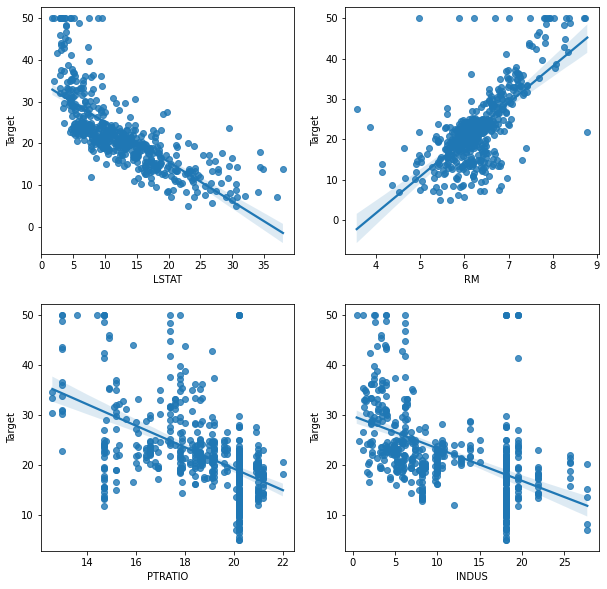

In [17]:
plt.figure(figsize=(10,10))  # 전체 크기 즉 배경 크기 확대

for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2,2,idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

# LSTAT와 RM 의 선형관계가 뚜렷하게 보인다. 


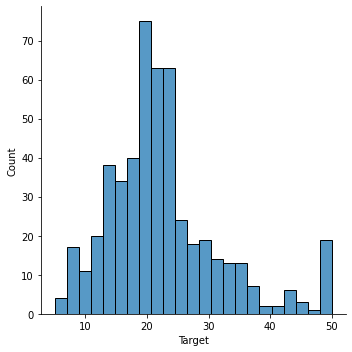

In [18]:
# 전체 주택 가격 분포

sns.displot(x='Target', data=df)

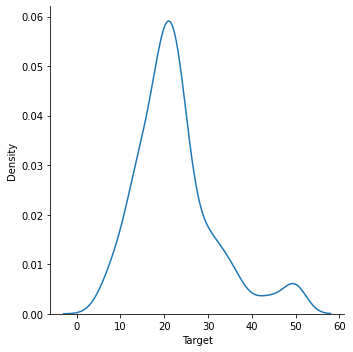

In [19]:
sns.displot(x='Target', data=df, kind='kde')

In [20]:
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성 

# 피처 스케일링 - 각 피처의 데이터 크기에 따른 상대적인 영향력의 차이를 제거하기 위해
#                피처들의 크기를 비슷한 수준으로 맞춰 주는 작업이 필요하다. 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]   # Target  은 제외
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:, :-1] = df_scaled[:,:]

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,20.6
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,23.9
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,22.0


In [21]:
# 학습 데이터와 검증용 데이터 분할

from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['LSTAT','RM']]
y_data = df.loc[:,'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2,
                                                    shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 일반적으로 검증 데이터를 10 ~ 30% 으로 설정한다. 검증 데이터의 비중이 너무 낮으면
# 훈련 데이터에 과대적합하는 것을 막기 어렵다. 반대로 검증데이터 너무 많으면 학습 자체에
# 필요한 데이터가 과소적합되어 학습이 잘 안된다.  

(404, 2) (404,)
(102, 2) (102,)


In [26]:
# 모델 생성

# 선형 회귀 LinearRegression

from sklearn.linear_model import LinearRegression

# 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_test_pred = lr.predict(X_test)

# 평가 (분류가 아니기 때문에 정확한 값을 비교할 수 없다. )
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE : ', train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE : ', test_mse)

# MSE Mean Squared Error  실제값과 예측값의 차이, 잔차의 제곱을 평균한 값
# 예측한 값과 실제값의 차이는 적을 수록 정확도가 올라간다. 

# 실제값 5 예측값 7  차이  2
# 실제값 5 예측값 3  차이 -2    

# 위 두 차이 값을 그냥 더하게 되면 0이 된다. 따라서 차이의 제곱으로 계산하면  2^2  -2^2

Train MSE :  30.804233918828984
Test MSE :  29.506547336671147


In [30]:
#  Lasso 

from sklearn.linear_model import Lasso
#학습
las = Lasso(alpha = 0.05)
las.fit(X_train, y_train)

#예측
y_train_pred = las.predict(X_train)
y_test_pred = las.predict(X_test)

# 평가 (분류가 아니기 때문에 정확한 값을 비교할 수 없다. )

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('Train MSE : ', train_mse)
print('Test MSE : ', test_mse)

Train MSE :  30.944034908761182
Test MSE :  30.2975547994607


In [31]:
# 의사결정나무 

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

#예측
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

# 평가 (분류가 아니기 때문에 정확한 값을 비교할 수 없다. )

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('Train MSE : ', train_mse)
print('Test MSE : ', test_mse)



Train MSE :  18.802883869508115
Test MSE :  17.90648054574048


In [33]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

#예측
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# 평가 (분류가 아니기 때문에 정확한 값을 비교할 수 없다. )

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('Train MSE : ', train_mse)
print('Test MSE : ', test_mse)

Train MSE :  16.02005482203282
Test MSE :  17.775138895365586


In [34]:
# XGBOOST - 케글 , 데이콘 등 대회에서 가장 많이 사용되는 알고리즘

from xgboost import XGBRegressor

xgbr = XGBRegressor(objective='reg:squarederror',max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

#예측
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

# 평가 (분류가 아니기 때문에 정확한 값을 비교할 수 없다. )

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('Train MSE : ', train_mse)
print('Test MSE : ', test_mse)

# 다른 알고리즘 들과 비교해보면 모델의 예측력은 상당히 향상된 것으로 보이지만 
# Train MSE 과 Test MSE 와 차이가 커져서 과대적합이 심화된것을 볼수 있다. 

# 데이터의 개수 작기 때문에 XGBoost 와 같이 복잡도가 높은 알고리즘에서는 오히려
# 쉽게 과대적합될 위험성이 높아진다. 

# 따라서 XGBoost 알고리즘이 가장 많이 사용되지만 비교적 데이터가 많은 경우
# 탁훨한 성능을 보인다. 

Train MSE :  8.232604305135567
Test MSE :  18.03177492971733


In [53]:
rfr.predict([[0.360375, 0.661621]])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([42.26674471])

In [48]:
dtr.predict([[0.360375, 0.661621]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([20.37722772])

In [49]:
las.predict([[0.360375, 0.661621]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([24.32956917])

In [50]:
lr.predict([[0.360375, 0.661621]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([24.71669069])